# Creating a map using geopandas
There are lots of benefits of using Choropleth maps (except for having to pronounce it of course!) 


# Step 1: import packages

As ususal let's first import our packages. Everything is as usual, except we'll also be using a new packaged called geopandas

In [8]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

import geopandas as gpd

# Step 2: get your data

In this case, we're using claimant count data for Greater Manchester. The claimant count measures the number of people claiming unemployment related benefits. 

There are 10 towns and cities that make up the Greater Manchester region. 

In [9]:
df = pd.read_excel('Manchester claimant count.xlsx')
df.head(n=10)

,Code,Area name,Count levels,% of population,Level change yoy,% change yoy,Unnamed: 6
0,E08000001,Bolton,14925,8.5,7160,4.1,North West
1,E08000002,Bury,8035,6.9,4000,3.4,North West
2,E08000003,Manchester,34565,8.9,18240,4.7,North West
3,E08000004,Oldham,13510,9.3,6660,4.6,North West
4,E08000005,Rochdale,11520,8.4,5805,4.2,North West
5,E08000006,Salford,14080,8.3,7415,4.4,North West
6,E08000007,Stockport,10590,6.0,5675,3.2,North West
7,E08000008,Tameside,11080,7.9,5600,4.0,North West
8,E08000009,Trafford,7680,5.3,4300,3.0,North West
9,E08000010,Wigan,13450,6.6,6090,3.0,North West


In [11]:
df.shape

(10, 7)

# Step 3: import your shapefile for Greater Manchester. 

Shapefiles for the UK are easily available from The Open Geography portal, a website from the ONS. 
You can check that out here: https://geoportal.statistics.gov.uk/

There are lots of free shapefiles online for other countries or for a world map. 

In [10]:
UK = "Local_Authority_Districts__April_2019__UK_BFC_v2-shp/Local_Authority_Districts__April_2019__UK_BFC_v2.shp"

map_df = gpd.read_file(UK)

map_df.head(n=4)

,OBJECTID,LAD19CD,LAD19NM,LAD19NMW,BNG_E,BNG_N,LONG,LAT,Shape__Are,Shape__Len,geometry
0,1,E06000001,Hartlepool,None,447157,531476,-1.27023,54.6762,9.355951e+07,71707.162397,"MULTIPOLYGON (((450156.801 525940.201, 450154...."
1,2,E06000002,Middlesbrough,None,451141,516887,-1.21099,54.5447,5.388858e+07,43840.876046,"MULTIPOLYGON (((451995.400 521026.897, 452169...."
2,3,E06000003,Redcar and Cleveland,None,464359,519597,-1.00611,54.5675,2.448203e+08,97993.352238,"MULTIPOLYGON (((451747.397 520561.100, 451792...."
3,4,E06000004,Stockton-on-Tees,None,444937,518183,-1.30669,54.5569,2.049622e+08,119581.539702,"MULTIPOLYGON (((450252.196 525902.201, 450241...."


In [4]:
map_df.shape

(382, 11)

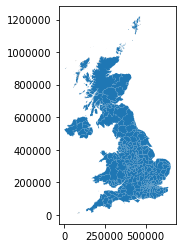

In [3]:
map_df.plot()

In [12]:
map_df = map_df[248:258] #only want to keep the 10 rows with Greater Manchester city and towns
map_df.head(n=15)

,OBJECTID,LAD19CD,LAD19NM,LAD19NMW,BNG_E,BNG_N,LONG,LAT,Shape__Are,Shape__Len,geometry
248,249,E08000001,Bolton,None,368352,409873,-2.47952,53.5845,1.397920e+08,82646.892945,"POLYGON ((375025.397 414992.099, 375032.702 41..."
249,250,E08000002,Bury,None,379658,410768,-2.30880,53.5931,9.946013e+07,68541.687282,"POLYGON ((382117.097 413139.899, 382126.299 41..."
250,251,E08000003,Manchester,None,384591,397063,-2.23359,53.4701,1.156482e+08,86851.007187,"POLYGON ((384375.197 404714.801, 384397.203 40..."
251,252,E08000004,Oldham,None,396603,406784,-2.05274,53.5577,1.423449e+08,71165.672087,"POLYGON ((399470.898 413357.697, 399484.799 41..."
252,253,E08000005,Rochdale,None,390315,412326,-2.14784,53.6074,1.581282e+08,82713.106698,"POLYGON ((398323.804 414179.902, 398315.303 41..."
253,254,E08000006,Salford,None,374556,398128,-2.38485,53.4793,9.719727e+07,63268.472555,"POLYGON ((377681.197 404158.100, 377744.997 40..."
254,255,E08000007,Stockport,None,391806,388264,-2.12467,53.3912,1.260403e+08,73638.581467,"POLYGON ((398352.802 392562.699, 398356.504 39..."
255,256,E08000008,Tameside,None,394987,397995,-2.07700,53.4787,1.031543e+08,55988.917879,"POLYGON ((402525.503 401459.003, 402464.803 40..."
256,257,E08000009,Trafford,None,375790,391162,-2.36572,53.4167,1.060448e+08,60712.610037,"POLYGON ((382486.204 397363.895, 382496.197 39..."
257,258,E08000010,Wigan,None,362136,402126,-2.57247,53.5145,1.881710e+08,88690.030571,"POLYGON ((358669.999 410970.300, 358665.200 41..."


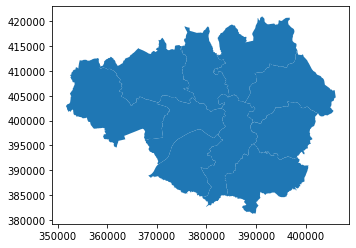

In [13]:
map_df.plot()

# Step 4: Merge your dataframe with the shapefile

In [14]:
merged = map_df.set_index('LAD19NM').join(df.set_index('Area name'))
merged.head()

,OBJECTID,LAD19CD,LAD19NMW,BNG_E,BNG_N,LONG,LAT,Shape__Are,Shape__Len,geometry,Code,Count levels,% of population,Level change yoy,% change yoy,Unnamed: 6
LAD19NM,,,,,,,,,,,,,,,,
Bolton,249,E08000001,None,368352,409873,-2.47952,53.5845,1.397920e+08,82646.892945,"POLYGON ((375025.397 414992.099, 375032.702 41...",E08000001,14925,8.5,7160,4.1,North West
Bury,250,E08000002,None,379658,410768,-2.30880,53.5931,9.946013e+07,68541.687282,"POLYGON ((382117.097 413139.899, 382126.299 41...",E08000002,8035,6.9,4000,3.4,North West
Manchester,251,E08000003,None,384591,397063,-2.23359,53.4701,1.156482e+08,86851.007187,"POLYGON ((384375.197 404714.801, 384397.203 40...",E08000003,34565,8.9,18240,4.7,North West
Oldham,252,E08000004,None,396603,406784,-2.05274,53.5577,1.423449e+08,71165.672087,"POLYGON ((399470.898 413357.697, 399484.799 41...",E08000004,13510,9.3,6660,4.6,North West
Rochdale,253,E08000005,None,390315,412326,-2.14784,53.6074,1.581282e+08,82713.106698,"POLYGON ((398323.804 414179.902, 398315.303 41...",E08000005,11520,8.4,5805,4.2,North West


# Step 5: Begin to 'assemble' your map 

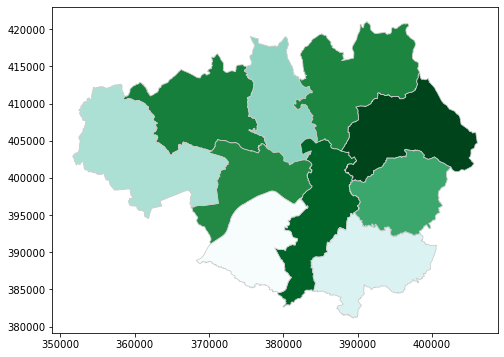

In [19]:
# set a variable that will call whatever column we want to visualise on the map
# In this case, it is claimants as a share of the population
claimant = '% of population'

# set the range for the choropleth
vmin, vmax = 2, 10
# create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(10, 6))

# create map
merged.plot(column=claimant, cmap= 'BuGn', linewidth=0.8, ax=ax, edgecolor='0.8')


# Step 6: Add in customisations

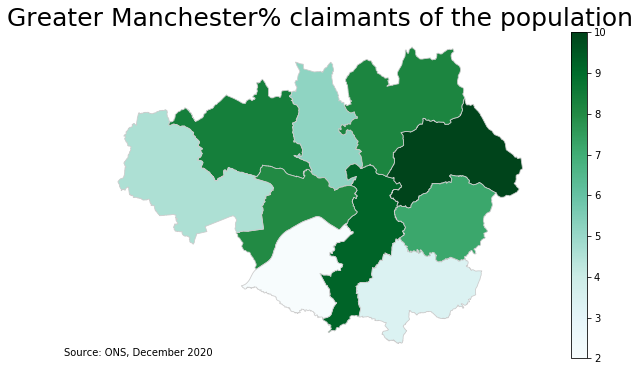

In [27]:
# our code from the previous slide
claimant = '% of population'
vmin, vmax = 2, 10
fig, ax = plt.subplots(1, figsize=(10, 6))
merged.plot(column=claimant, cmap= 'BuGn', linewidth=0.8, ax=ax, edgecolor='0.8')


# remove the axis
ax.axis('off')

# add a title
ax.set_title('Greater Manchester% claimants of the population', fontdict={'fontsize': '25', 'fontweight' : '3'})
# create an annotation for the data source
ax.annotate('Source: ONS, December 2020',xy=(0.1, .08),  xycoords='figure fraction')

            
# Create colorbar as a legend
sm = plt.cm.ScalarMappable(cmap='BuGn', norm=plt.Normalize(vmin=vmin, vmax=vmax))
# empty array for the data range
sm._A = []

# add the colorbar to the figure
cbar = fig.colorbar(sm)  

plt.show()

# Step 7: Save your map as a png file! 

In [28]:
fig.savefig('map_manchester_claimants.png', dpi=300)